Ahihi. This is the first notebook. I have neva use this before =))
This is the homework

Please download the file  Homework_sampledata1.txt from here:

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation.
Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

Your task is:
1. Upload it to your google drive. Load the text file from google drive. Every first day of the month, print the time and the data.
Like this: https://i.imgur.com/D5UxOz7.png



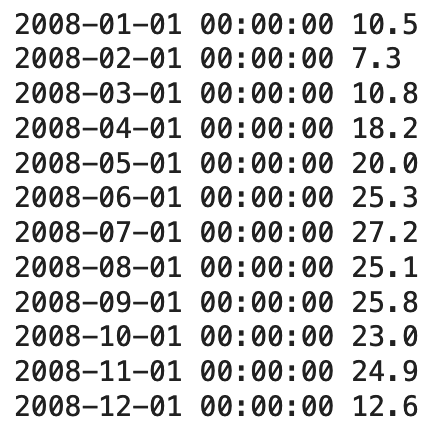

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_fwf('/content/drive/MyDrive/Data Visualization/Homework_sampledata1.txt', sep = '\s+')
df = df.set_index('2008')
df.columns = [date(2008,m,1).strftime('%b') for m in range(1,13)]

today = '2007-12-01'
for i in range(12):
    new_day = pd.to_datetime(today) + pd.DateOffset(months = 1)
    today = new_day
    print(new_day, df.iloc[0].values[i])

2008-01-01 00:00:00 10.5
2008-02-01 00:00:00 7.3
2008-03-01 00:00:00 10.8
2008-04-01 00:00:00 18.2
2008-05-01 00:00:00 20.0
2008-06-01 00:00:00 25.3
2008-07-01 00:00:00 27.2
2008-08-01 00:00:00 25.1
2008-09-01 00:00:00 25.8
2008-10-01 00:00:00 23.0
2008-11-01 00:00:00 24.9
2008-12-01 00:00:00 12.6




_______________________________________________________________
2. The value = -99 means that this is the missing value. The missing value may due to the instrumental error. Remove this value.
3. Plot the daily temperature from 01 Jan 2008 to 31 Dec 2008. Save the file as 'Figure1_1.png'.

Like this: https://i.imgur.com/45vmgsU.png

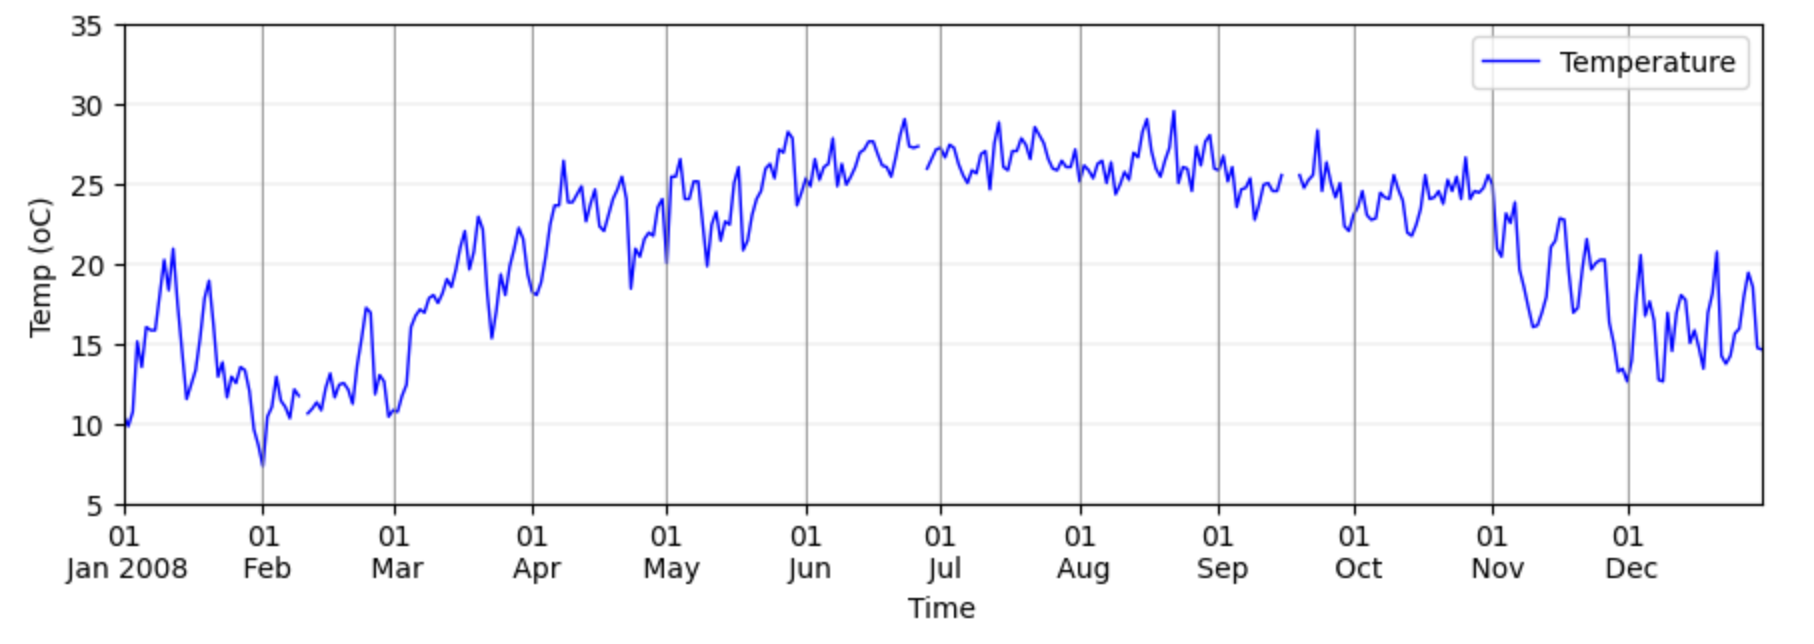

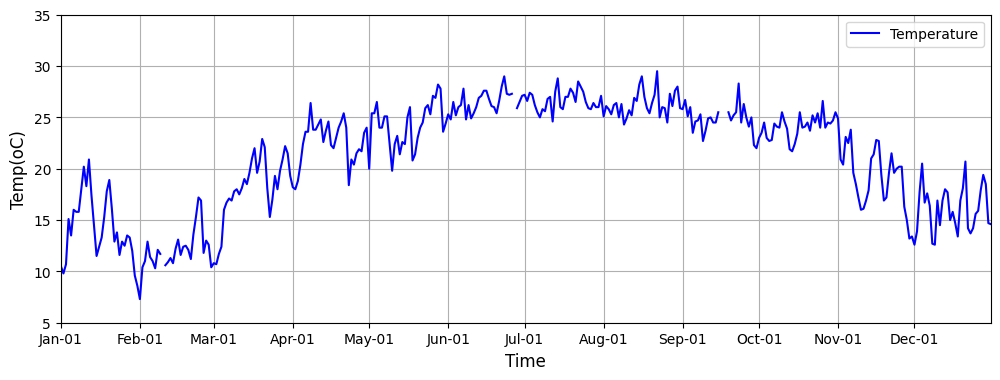

In [ ]:
#put your code here
df = df.replace(-99.0, np.nan)

#list of all value
df_list = [df[i] for i in df.columns]

#delete last nan value of each month
new_list = []
for i in range(len(df_list)):
    l = df_list[i].tolist()
    if (pd.isna(l[-1])):
        if (i==1) and (pd.isna(l[-2])):
            del l[-2:]
        else:
            del l[-1]
    new_list.append(l)

#flatten the list
flatten = [item for sublist in new_list for item in sublist]

#list of day
start_date = datetime.strptime("2008-Jan-01", "%Y-%b-%d")
end_date = datetime.strptime("2008-Dec-31", "%Y-%b-%d")
D = 'D'

date_list = pd.date_range(start_date, end_date, freq=D)
date_list = date_list.strftime("%b-%d")

#list of first day of each month
dates= pd.date_range('2008-01-01','2008-12-31' , freq='1M')-pd.offsets.MonthBegin(1)
dates = dates.strftime("%b-%d").tolist()

#plot
plt.figure(figsize = (12,4))
plt.plot(date_list, flatten, 'b-')
plt.xticks(dates)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.xlim(0,365)
plt.ylim(5,35)
plt.legend(["Temperature"])
plt.savefig("Figure1_1.png")
plt.show()

_______________________________________________________________

4. Calculate the monthly mean in 2008. Please note that the days in different months are different. Save the file as 'Figure1_2.png'.

Like this: https://i.imgur.com/2f6ogEc.png

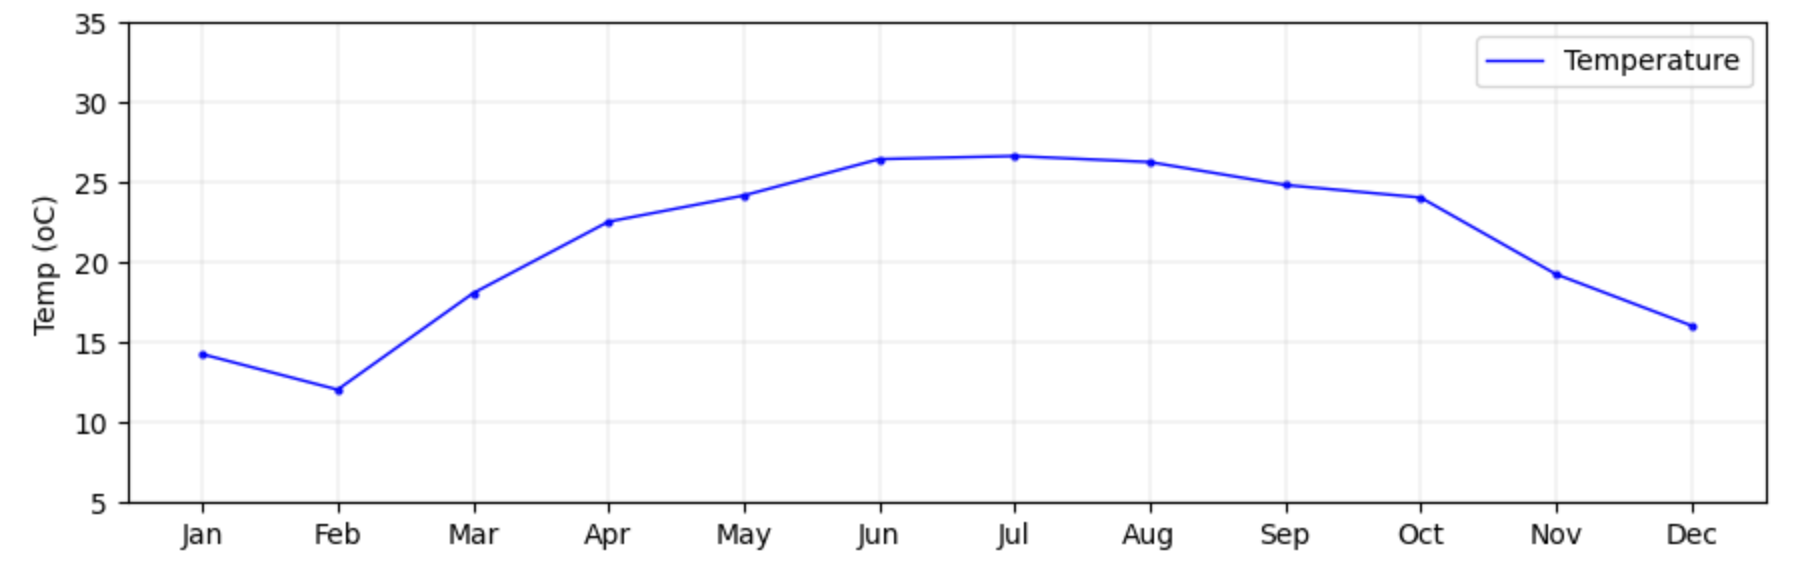

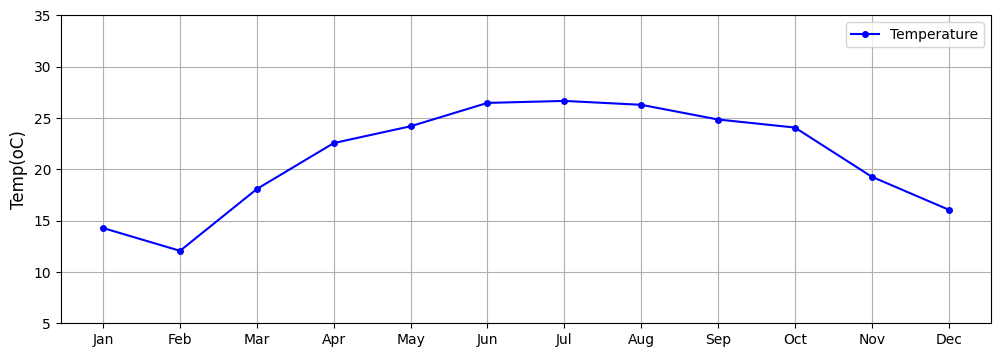

In [ ]:
#put your code here
#calculate monthly mean
mean_data = [np.nanmean(df_list[i].tolist()) for i in range(len(df_list))]

#plot
plt.figure(figsize = (12,4))
plt.plot(df.columns, mean_data,color='b',marker="o", ms = 4)
plt.xticks(df.columns)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.ylim(5,35)
plt.legend(["Temperature"])
plt.savefig("Figure1_2.png")
plt.show()